In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [2]:
def OptimalW(X,w,y,l,n,ymse):
    max_steps = 0
    k=1
    alpha = 1/k
    i = 0
    delta = 0.0000001
    gradient = grad(X,w,y,l)
    while (alpha*np.linalg.norm(gradient) >= delta) \
    and (max_steps < 5000):
        gradient = grad(X,w,y,l)
        w = w - alpha*gradient
        ymse[i] = MSPE(X,w,y,l)
        i+=1
        k+=1
        alpha = 1/k
        max_steps+=1
    return w

def grad(X,w,y,l):
    s = 0
    gradient = np.random.uniform(-10, 10, (len(w), 1))
    for j in range(len(w)):
        i = random.randint(0,l)
        s = s + (X[i][j]/y[i]) * ((y[i] - np.matmul(X[i],w))/y[i])
        gradient[j] = s*(-2 / l)
        s = 0
    return gradient



def MSPE(X,w,y,l):
    s = 0
    for i in range(l):
        s+=((y[i] - np.matmul(X[i],w))/y[i])**2
    return s*2/l

Optimal weight:
[[0.01083166]
 [0.00991334]
 [0.0048648 ]
 [0.00519126]
 [0.00141132]]
MSPE= [1.98759158]


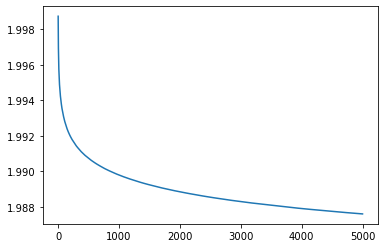

In [3]:
details =[]
with open('Details.csv', 'r') as csv_file: 
    csv_file = csv.reader(csv_file, delimiter=';') 
    for row in csv_file: 
        details.append(row)
details = np.array(details)[1:]
details = np.array(details, dtype='float')
detailsSearchX = details[:210,:4]
detailsSearchy =details[:210, 4]
obj = 210
ftr = 4

X1 = np.ones((obj,1))
detailsSearchX = np.hstack((detailsSearchX,X1))

ymse = np.zeros((5000,1))

w = np.zeros((ftr + 1, 1))
w0 = OptimalW(detailsSearchX,w,detailsSearchy,obj,ftr,ymse)
print("Optimal weight:")
print(w0)
sum = MSPE(detailsSearchX,w0,detailsSearchy,obj)
print("MSPE=" , sum)
x = np.arange(5000)
plt.plot(x, ymse)

In [14]:
detailsCheckX = details[210:,:4]
detailsChecky =details[210:, 4]
X11 = np.ones((90,1))
detailsCheckX = np.hstack((detailsCheckX,X11))
sc = 0
for i in range(90):
    sc+=((detailsChecky[i] - np.matmul(detailsCheckX[i],w0))/detailsChecky[i])**2
print(sc*2/90)

[0.06352642]


In [15]:
detailsCheckX.dot(w0) - detailsChecky

array([[ -9.12607764, -16.9788907 , -26.55620468, ..., -16.87181266,
        -37.06146784, -22.75293789],
       [ -1.44752734,  -9.30034041, -18.87765438, ...,  -9.19326237,
        -29.38291754, -15.0743876 ],
       [  5.27155926,  -2.5812538 , -12.15856778, ...,  -2.47417576,
        -22.66383094,  -8.35530099],
       ...,
       [ -2.05034134,  -9.90315441, -19.48046838, ...,  -9.79607637,
        -29.98573154, -15.67720159],
       [ 14.98773833,   7.13492526,  -2.44238871, ...,   7.2420033 ,
        -12.94765187,   1.36087808],
       [  3.20330548,  -4.64950759, -14.22682156, ...,  -4.54242955,
        -24.73208472, -10.42355478]])